In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import numpy as np

In [2]:

RAW_DATA_DIR = Path('../raw_data/')
DATA_DIR = Path('../data/')

# Basic EDA

## Renewals

In [3]:
# Renewals
renewals = pd.read_csv(DATA_DIR / 'renewals_totals.csv', index_col=0, dtype={'ZIP Code': str})
renewals.head(2)

,ZIP Code,New,Renewed,Expiring,Insured-Initiated Nonrenewed,Insurer-Initiated Nonrenewed,Pct NonRenewed,Pct NonRenewed Owner,Pct NonRenewed Company
0,90001,5348,37886,42472,2974,1612,0.107977,0.070023,0.037954
1,90002,5837,37321,42395,3444,1630,0.119684,0.081236,0.038448


In [4]:
renewals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1697 entries, 0 to 1700
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ZIP Code                      1697 non-null   object 
 1   New                           1697 non-null   int64  
 2   Renewed                       1697 non-null   int64  
 3   Expiring                      1697 non-null   int64  
 4   Insured-Initiated Nonrenewed  1697 non-null   int64  
 5   Insurer-Initiated Nonrenewed  1697 non-null   int64  
 6   Pct NonRenewed                1697 non-null   float64
 7   Pct NonRenewed Owner          1697 non-null   float64
 8   Pct NonRenewed Company        1697 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 132.6+ KB


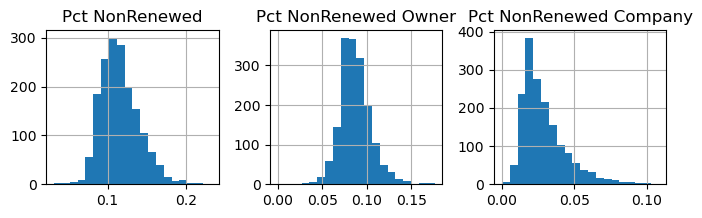

In [5]:
# distribution
feats = ['Pct NonRenewed', 'Pct NonRenewed Owner', 'Pct NonRenewed Company']
renewals[feats].hist(bins=20, layout=(1, 3), figsize=(8,2))
plt.show()

## Premiums

In [6]:
premiums = pd.read_csv(DATA_DIR / 'premiums_totals.csv', dtype={'ZIP Code': str}, index_col=0)
premiums.head(2)

,2018,2019,2020,2021,2022,2023,Pct Change 2018-21
ZIP Code,,,,,,,
90001,484901.285714,504140.857143,547563.857143,708151.833333,772361.666667,851829.0,0.460404
90002,569980.500000,603840.833333,660567.166667,721661.333333,795190.333333,868758.0,0.266116


In [7]:
premiums.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2040 entries, 90001 to 96162
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   2018                2040 non-null   float64
 1   2019                2025 non-null   float64
 2   2020                2017 non-null   float64
 3   2021                2040 non-null   float64
 4   2022                2014 non-null   float64
 5   2023                1995 non-null   float64
 6   Pct Change 2018-21  2040 non-null   float64
dtypes: float64(7)
memory usage: 192.0+ KB


In [8]:
# log normalize yearly earned premiums

premiums['log_2018'] = np.log(premiums['2018'])
premiums['log_2021'] = np.log(premiums['2021'])

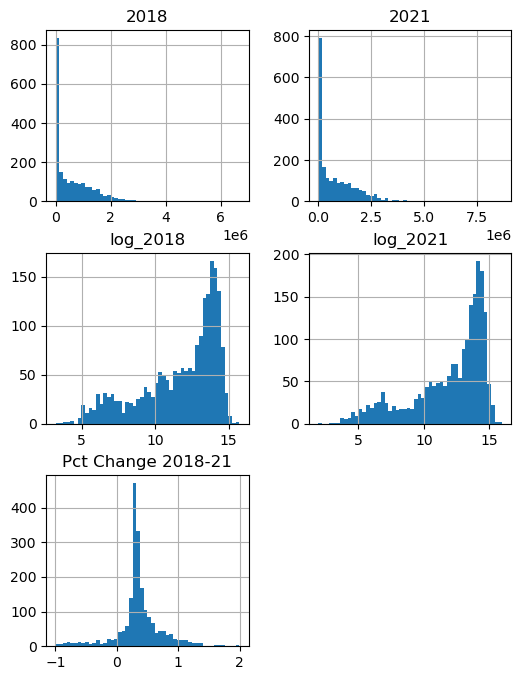

In [9]:
premiums[['2018','2021','log_2018','log_2021','Pct Change 2018-21']].hist(bins=50, figsize=(6,8), layout=(3,2))
plt.show()

# FAIR Plan

In [59]:
# FAIR Plan
fair = pd.read_csv(DATA_DIR / 'fair_plan.csv', index_col=0, dtype={'ZIP Code': str})
fair.head(2)

,ZIP Code,growth_pol_23_24,policies_24,growth_pol_22_23,policies_23,growth_pol_21_22,policies_22,growth_pol_20_21,policies_21,policies_20,growth_exp_23_24,exposure_24,growth_exp_22_23,exposure_23,growth_exp_21_22,exposure_22,growth_exp_20_21,exposure_21,exposure_20
0,94501,0.333,104,0.04,78,-0.063,75,0.0,80,80,0.676,98431342,0.179,58719416,0.137,49797731,0.091,43791971,40143917
1,94502,2.500,7,0.00,2,1.000,2,0.0,1,1,13.274,6880050,0.025,481983,1.850,470279,0.000,165000,165000


In [60]:
fair.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 1648
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ZIP Code          1649 non-null   object 
 1   growth_pol_23_24  1649 non-null   float64
 2   policies_24       1649 non-null   int64  
 3   growth_pol_22_23  1649 non-null   float64
 4   policies_23       1649 non-null   int64  
 5   growth_pol_21_22  1649 non-null   float64
 6   policies_22       1649 non-null   int64  
 7   growth_pol_20_21  1649 non-null   float64
 8   policies_21       1649 non-null   int64  
 9   policies_20       1649 non-null   int64  
 10  growth_exp_23_24  1649 non-null   float64
 11  exposure_24       1649 non-null   int64  
 12  growth_exp_22_23  1649 non-null   float64
 13  exposure_23       1649 non-null   int64  
 14  growth_exp_21_22  1649 non-null   float64
 15  exposure_22       1649 non-null   int64  
 16  growth_exp_20_21  1649 non-null   float64
 17  

In [61]:
fair.sample(3)

,ZIP Code,growth_pol_23_24,policies_24,growth_pol_22_23,policies_23,growth_pol_21_22,policies_22,growth_pol_20_21,policies_21,policies_20,growth_exp_23_24,exposure_24,growth_exp_22_23,exposure_23,growth_exp_21_22,exposure_22,growth_exp_20_21,exposure_21,exposure_20
690,93635,0.600,16,0.667,10,0.000,6,0.200,6,5,0.776,11548008,1.848,6500657,0.191,2282180,0.249,1916705,1534228
1329,93454,0.370,100,0.141,73,0.333,64,0.371,48,35,0.577,87746966,0.204,55645209,0.529,46233178,0.406,30230843,21507194
851,92886,2.133,423,0.517,135,0.000,89,0.508,89,59,2.737,644955252,0.603,172600065,0.076,107642767,0.951,100080207,51287479


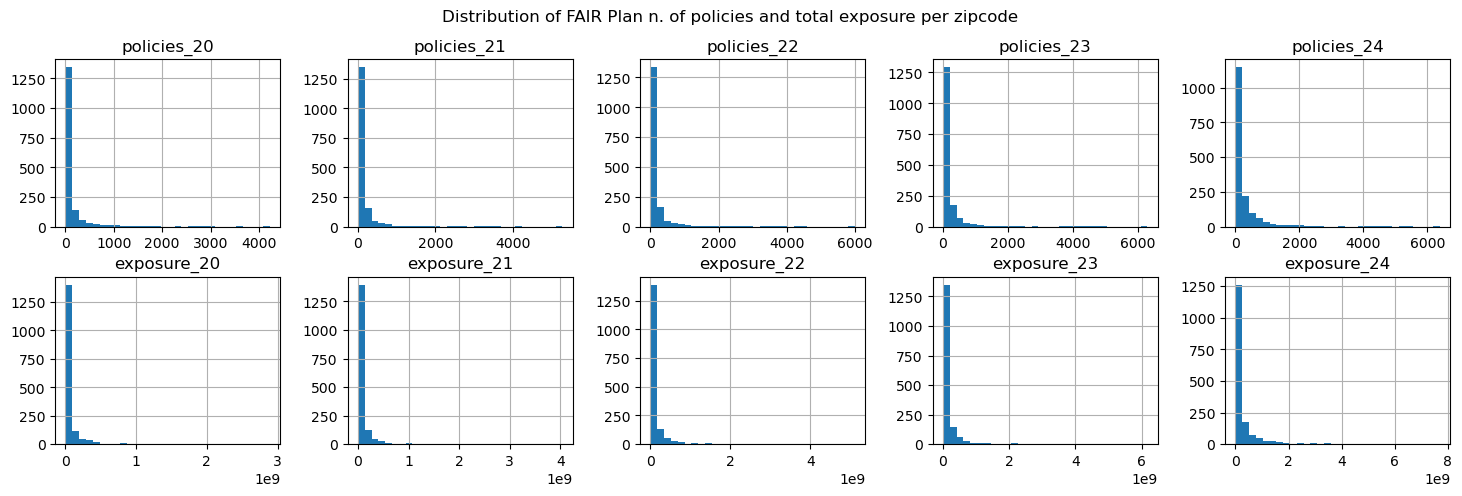

In [70]:
fair[['policies_20', 'policies_21', 'policies_22', 'policies_23', 'policies_24', 
    'exposure_20', 'exposure_21', 'exposure_22', 'exposure_23', 'exposure_24']
    ].hist(bins=30, layout=(2,5), figsize=(18,5))

plt.suptitle('Distribution of FAIR Plan n. of policies and total exposure per zipcode')

plt.show()

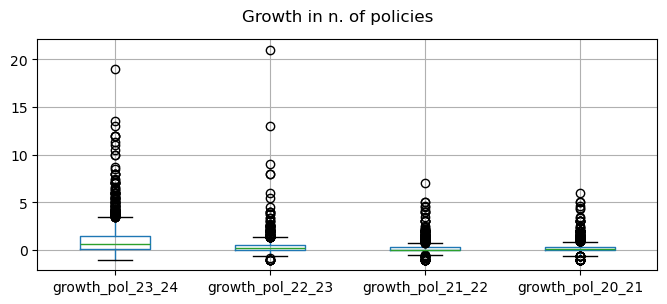

In [77]:
fair[['growth_pol_23_24', 'growth_pol_22_23', 'growth_pol_21_22', 'growth_pol_20_21']].boxplot(figsize=(8,3))

plt.suptitle('Growth in n. of policies')

plt.show()

(<Axes: >, <seaborn.axisgrid.FacetGrid at 0x295daf54740>)

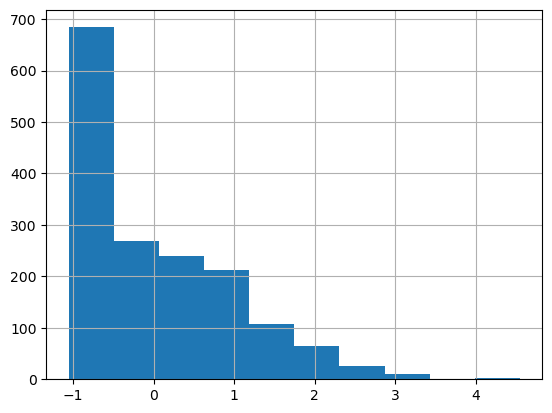

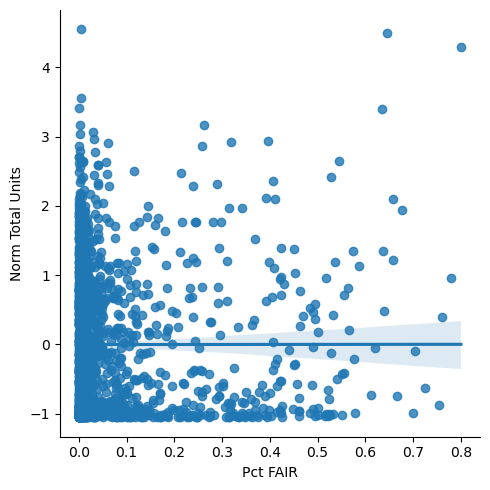

In [ ]:
# mean-normalize 'Total Ins Units'
from sklearn.preprocessing import StandardScaler

x = fair['Total Ins Units'].values.reshape(-1,1) #returns a numpy array
min_max_scaler = StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
fair['Norm Total Units'] = pd.DataFrame(x_scaled)

fair['Norm Total Units'].hist(), sns.lmplot(data=fair, y='Norm Total Units', x='Pct FAIR')


In [31]:
# merging all datasets
merge1 = pd.merge(renewals, premiums, on='ZIP Code')
merge2 = pd.merge(merge1, fair, on='ZIP Code')

In [3]:
zipcodes = gpd.read_file(DATA_DIR / 'CA_zipcodes.geojson')

In [4]:
zipcodes.rename(columns={'ZIP_CODE': 'ZIP Code'}, inplace=True)

In [5]:
renewals_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1701 entries, 0 to 1700
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ZIP Code                      1701 non-null   object 
 1   New                           1701 non-null   int64  
 2   Renewed                       1701 non-null   int64  
 3   Expiring                      1701 non-null   int64  
 4   Insured-Initiated Nonrenewed  1701 non-null   int64  
 5   Insurer-Initiated Nonrenewed  1701 non-null   int64  
 6   Pct NonRenewed                1701 non-null   float64
 7   Pct NonRenewed Owner          1701 non-null   float64
 8   Pct NonRenewed Company        1701 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 132.9+ KB


In [6]:
merged = pd.merge(zipcodes, renewals_t, on='ZIP Code')

<Axes: >

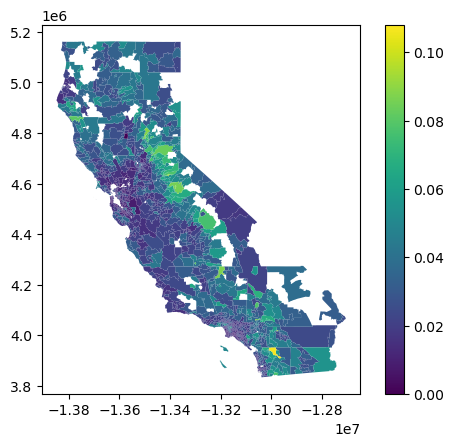

In [7]:
merged.plot(column='Pct NonRenewed Company', legend=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1717 entries, 0 to 1716
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ZIP Code                1717 non-null   object 
 1   Voluntary Market Units  1717 non-null   int64  
 2   FAIR Plan Units         1717 non-null   int64  
 3   Total Ins Units         1717 non-null   int64  
 4   Pct Market              1717 non-null   float64
 5   Pct FAIR                1717 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 93.9+ KB


In [ ]:
step1 = pd.merge(renewals_t, fair, on='ZIP Code')
insurance = pd.merge(step1, premiuns, on='ZIP Code')

In [ ]:
features = ['Pct NonRenewed Company', 'Pct FAIR', 'Pct Premium Increase 18-21']

insurance[features].corr()

,Pct NonRenewed Company,Pct FAIR,Pct Premium Increase 18-21
Pct NonRenewed Company,1.000000,0.727360,0.489322
Pct FAIR,0.727360,1.000000,0.650911
Pct Premium Increase 18-21,0.489322,0.650911,1.000000


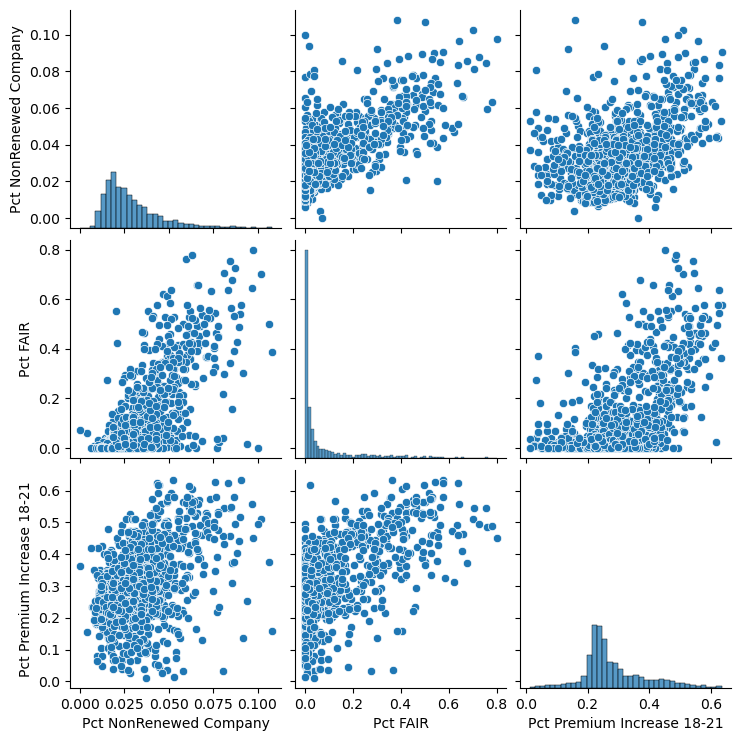

In [66]:
sns.pairplot(insurance[features])

In [ ]:
# outliers on premium increase